# 제 5회 L.Point Big Data Competition - Digital Trend Analyzer



## 1.Import Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
df_Product = pd.read_csv('Data//01_Product.csv')
df_Search1 = pd.read_csv('Data//02_Search1.csv')
df_Search2 = pd.read_csv('Data//03_Search2.csv')
df_Custom = pd.read_csv('Data//04_Custom.csv')
df_Session = pd.read_csv('Data//05_Session.csv')
df_Master = pd.read_csv('Data//06_Master.csv')

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_Product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


In [4]:
df_Search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [5]:
df_Search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


In [6]:
df_Custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [7]:
df_Session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


In [8]:
df_Master.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


## 1. 결측값 및 이상치 확인

### 1) Product

In [9]:
#Missing Values
df_Product.isna().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_ADD_NM    0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

In [10]:
#Data type
df_Product.dtypes

CLNT_ID       int64
SESS_ID       int64
HITS_SEQ      int64
PD_C          int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtype: object

In [11]:
df_Product.CLNT_ID = df_Product.CLNT_ID.astype(int)
df_Product.SESS_ID = df_Product.SESS_ID.astype(int)
df_Product.HITS_SEQ = df_Product.HITS_SEQ.astype(int)
df_Product.PD_C = df_Product.PD_C.astype(int)
df_Product.PD_ADD_NM = df_Product.PD_ADD_NM.astype(str)
df_Product.PD_BRA_NM = df_Product.PD_BRA_NM.astype(str)
df_Product.PD_BUY_AM = df_Product.PD_BUY_AM.apply(lambda x : str(x).replace(",","")).astype(int)
df_Product.PD_BUY_CT = df_Product.PD_BUY_CT.apply(lambda x : str(x).replace(",","")).astype(int)

In [12]:
# Data type Again
df_Product.dtypes

CLNT_ID       int32
SESS_ID       int32
HITS_SEQ      int32
PD_C          int32
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM     int32
PD_BUY_CT     int32
dtype: object

### 2) Search1

In [13]:
#Missing Values
df_Search1.isna().sum()

CLNT_ID       0
SESS_ID       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [14]:
# Data type
df_Search1.dtypes

CLNT_ID        int64
SESS_ID        int64
KWD_NM        object
SEARCH_CNT     int64
dtype: object

In [15]:
df_Search1.CLNT_ID = df_Search1.CLNT_ID.astype(int)
df_Search1.SESS_ID = df_Search1.SESS_ID.astype(int)
df_Search1.KWD_NM = df_Search1.KWD_NM.astype(str)
df_Search1.SEARCH_CNT = df_Search1.SEARCH_CNT.astype(int)

In [16]:
# Data type Again
df_Search1.dtypes

CLNT_ID        int32
SESS_ID        int32
KWD_NM        object
SEARCH_CNT     int32
dtype: object

### 3) Search2

In [17]:
#Missing Values
df_Search2.isna().sum()

SESS_DT       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [18]:
# Data type
df_Search2.dtypes

SESS_DT        int64
KWD_NM        object
SEARCH_CNT    object
dtype: object

In [19]:
df_Search2.SESS_DT = pd.to_datetime(df_Search2.SESS_DT,format="%Y%m%d")
df_Search2.KWD_NM = df_Search2.KWD_NM.astype(str)
df_Search2.SEARCH_CNT = df_Search2.SEARCH_CNT.apply(lambda x : str(x).replace(",","")).astype(int)

In [20]:
# Data type Again
df_Search2.dtypes

SESS_DT       datetime64[ns]
KWD_NM                object
SEARCH_CNT             int32
dtype: object

### 4) Custom

In [21]:
#Missing Values
df_Custom.isna().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [22]:
#Data Type
df_Custom.dtypes

CLNT_ID         int64
CLNT_GENDER    object
CLNT_AGE        int64
dtype: object

In [23]:
df_Custom.CLNT_ID = df_Custom.CLNT_ID.astype(int)
df_Custom.CLNT_GENDER = df_Custom.CLNT_GENDER.astype(str)
df_Custom.CLNT_AGE = df_Custom.CLNT_AGE.astype(int)

In [24]:
#Data Type again
df_Custom.dtypes

CLNT_ID         int32
CLNT_GENDER    object
CLNT_AGE        int32
dtype: object

### 5) Session

In [25]:
#Missing Values
df_Session.isna().sum()

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

In [26]:
df_Session.dtypes

CLNT_ID              int64
SESS_ID              int64
SESS_SEQ             int64
SESS_DT              int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V       object
DVC_CTG_NM          object
ZON_NM              object
CITY_NM             object
dtype: object

In [27]:
#TOT_PAG_VIEW_CT가 0인 경우
sum(df_Session.TOT_PAG_VIEW_CT == 0)

0

In [28]:
#TOT_SESS_HR_V가 0인 경우
sum(df_Session.TOT_SESS_HR_V == '0')

0

In [29]:
# 결측값 비율
print('결측값 비율')
round(len(df_Session[df_Session.TOT_PAG_VIEW_CT.isna()|df_Session.TOT_SESS_HR_V.isna()])/len(df_Session),3)

결측값 비율


0.005

In [30]:
df_Session[df_Session.TOT_PAG_VIEW_CT.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
11409,5075856,6836578,19,20180608,NaN,NaN,mobile,Seoul,Seoul
26628,5368135,4391880,10,20180718,NaN,NaN,mobile,Chungcheongnam-do,Yeongi-gun
43241,5687186,852560,40,20180916,NaN,NaN,mobile,Seoul,Seoul
58494,6104032,1568619,78,20180904,NaN,NaN,mobile,Chungcheongnam-do,Cheonan-si
64700,3735745,6884635,1,20180607,NaN,NaN,desktop,Gwangju,Gwangju


In [31]:
df_Session[df_Session.TOT_PAG_VIEW_CT.isna()&~df_Session.TOT_SESS_HR_V.isna()]

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
67340,401333,3950587,5,20180725,NaN,"1,583",mobile,Seoul,Seoul
395208,3449659,4394290,1,20180718,NaN,18,desktop,Busan,Busan
817841,3309257,2890087,20,20180813,NaN,9,mobile,Seoul,Seoul
1153340,19441,6220093,1,20180618,NaN,5,desktop,Gyeonggi-do,Hwaseong-si
1196086,5483124,5361386,1,20180702,NaN,44,desktop,Chungcheongbuk-do,Okcheon-gun
1198860,3436252,3960033,5,20180725,NaN,2,mobile,Gyeonggi-do,Gimpo-si
1669417,99352,6907444,1,20180607,NaN,53,desktop,Gyeonggi-do,Siheung-si
2136810,2549138,5905220,1,20180623,NaN,1,desktop,Gwangju,Gwangju
2165594,2458359,3251800,1,20180806,NaN,2,desktop,Daejeon,Daejeon


In [32]:
#TOT_PAG_VIEW_CT 와 TOT_SESS_HR_V가 모두 NaN인 경우
print('TOT_PAG_VIEW_CT 와 TOT_SESS_HR_V가 모두 NaN인 경우')
round(len(df_Session[(df_Session.TOT_PAG_VIEW_CT.isna())&df_Session.TOT_SESS_HR_V.isna()])/len(df_Session[df_Session.TOT_PAG_VIEW_CT.isna()]),3)

TOT_PAG_VIEW_CT 와 TOT_SESS_HR_V가 모두 NaN인 경우


0.967

In [33]:
df_Session[df_Session.TOT_SESS_HR_V.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
38,5878756,7465325,5,20180529,1.0,NaN,mobile,Chungcheongnam-do,Cheonan-si
64,6065738,9564520,26,20180424,1.0,NaN,mobile,Gyeonggi-do,Gwangmyeong-si
65,6065738,9564529,25,20180424,1.0,NaN,mobile,Gyeonggi-do,Gwangmyeong-si
246,6003295,1035552,2,20180913,1.0,NaN,desktop,Daejeon,Daejeon
604,5946142,9600252,4,20180423,1.0,NaN,mobile,Seoul,Seoul


In [34]:
#TOT_PAG_VIEW_CT == 1 이고 TOT_SESS_HR_V는 NaN인 경우
print('TOT_PAG_VIEW_CT == 1 이고 TOT_SESS_HR_V는 NaN인 경우')
round(len(df_Session[(df_Session.TOT_PAG_VIEW_CT == 1)&df_Session.TOT_SESS_HR_V.isna()])/len(df_Session[df_Session.TOT_SESS_HR_V.isna()]),3)

TOT_PAG_VIEW_CT == 1 이고 TOT_SESS_HR_V는 NaN인 경우


0.977

In [35]:
df_Session[(df_Session.TOT_PAG_VIEW_CT>1)&df_Session.TOT_SESS_HR_V.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
18500,3107805,2566536,78,20180818,2.0,NaN,mobile,Seoul,Seoul
36640,5586415,10670905,26,20180405,2.0,NaN,desktop,Seoul,Seoul
73380,1217492,8268389,70,20180515,2.0,NaN,mobile,Ulsan,Ulsan
88197,470431,5465686,15,20180701,2.0,NaN,mobile,Busan,Busan
93259,784998,6224692,23,20180618,2.0,NaN,mobile,Seoul,Seoul


In [36]:
#TOT_PAG_VIEW_CT > 1이고 TOT_SESS_HR_V는 NaN인 경우
len(df_Session[(df_Session.TOT_PAG_VIEW_CT>1)&df_Session.TOT_SESS_HR_V.isna()])

67

In [37]:
df_Session[(df_Session.TOT_PAG_VIEW_CT>3)&df_Session.TOT_SESS_HR_V.isna()].head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
2167579,5576226,3968457,2,20180725,7.0,NaN,desktop,Seoul,Seoul
2167580,5576226,3435063,5,20180803,5.0,NaN,desktop,Seoul,Seoul


#### NaN처리 방법

#### 1. 결측값이 전체 데이터의 0.005에 불과하므로 결측값을 제거하고 남은 데이터만 이용한다.

#### 2. 결측값을 0으로 대체


##### TOT_SESS_HR_V의 NaN 값은 세션 내에서 1초 이내동안만 머물렀기 때문 값이 입력이 되지 않은 것으로 생각된다. TOT_SESS_HR_V의 값이 0인 경우가 없다는 점과, TOT_PAG_VIEW_CT 변수는 1이면서 TOT_SESS_HR_V의 값이 NaN인 경우가 97%이상이며 TOT_SESS_HR_V가 NaN일 때 TOT_PAG_VIEW_CT의 최대값이 7이라는 점이 이를 방증해준다. 

##### 또한 TOT_PAG_VIEW_CT역시 0값이 존재하지 않으며 96%이상이 TOT_SESS_HR_V가 NaN일 때, 즉 세션 내에 머문 시간이 1초 이내일 떄 NaN값을 보인다. TOT_SESS_HR_V가 NaN이 아님에도 TOT_PAG_VIEW_CT가 NaN인 경우는 세션의 오류로 인해 페이지 뷰 수가 늘어나지 않은 것으로 사려된다. 

##### 따라서 이 두 변수에서의 NaN을 0으로 설정한다.

In [38]:
df_Session_new = df_Session.copy()
df_Session_new.TOT_PAG_VIEW_CT = df_Session_new.TOT_PAG_VIEW_CT.fillna(0)
df_Session_new.TOT_SESS_HR_V = df_Session_new.TOT_SESS_HR_V.fillna(0)

In [39]:
df_Session_new.CLNT_ID = df_Session_new.CLNT_ID.astype(int)
df_Session_new.SESS_ID = df_Session_new.SESS_ID.astype(int)
df_Session_new.SESS_SEQ = df_Session_new.SESS_SEQ.astype(int)
df_Session_new.SESS_DT = pd.to_datetime(df_Session_new.SESS_DT,format="%Y%m%d")
df_Session_new.TOT_PAG_VIEW_CT = df_Session_new.TOT_PAG_VIEW_CT.astype(int)
df_Session_new.TOT_SESS_HR_V = df_Session_new.TOT_SESS_HR_V.apply(lambda x : str(x).replace(",","")).astype(int)
df_Session_new.DVC_CTG_NM = df_Session_new.DVC_CTG_NM.astype(str)
df_Session_new.ZON_NM = df_Session_new.ZON_NM.astype(str)
df_Session_new.CITY_NM = df_Session_new.CITY_NM.astype(str)

In [40]:
df_Session_new.dtypes

CLNT_ID                     int32
SESS_ID                     int32
SESS_SEQ                    int32
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT             int32
TOT_SESS_HR_V               int32
DVC_CTG_NM                 object
ZON_NM                     object
CITY_NM                    object
dtype: object

### 6) Master

In [41]:
df_Master.isna().sum()

PD_C        0
PD_NM       0
CLAC1_NM    0
CLAC2_NM    0
CLAC3_NM    0
dtype: int64

In [42]:
df_Master.dtypes

PD_C         int64
PD_NM       object
CLAC1_NM    object
CLAC2_NM    object
CLAC3_NM    object
dtype: object

In [43]:
df_Master.PD_C = df_Master.PD_C.astype(int)
df_Master.PD_NM = df_Master.PD_NM.astype(str)
df_Master.CLAC1_NM = df_Master.CLAC1_NM.astype(str)
df_Master.CLAC2_NM = df_Master.CLAC2_NM.astype(str)
df_Master.CLAC3_NM = df_Master.CLAC3_NM.astype(str)

In [44]:
df_Master.dtypes

PD_C         int32
PD_NM       object
CLAC1_NM    object
CLAC2_NM    object
CLAC3_NM    object
dtype: object

### 데이터 저장

In [45]:
#df_Product.to_csv('Data//Product_new.csv',index =False)
#df_Search1.to_csv('Data//Search1_new.csv',index =False)
#df_Search2.to_csv('Data//Search2_new.csv',index =False)
#df_Custom.to_csv('Data//Custom_new.csv',index =False)
#df_Session_new.to_csv('Data//Session_new.csv',index =False)
#df_Master.to_csv('Data//Master_new.csv',index =False)

## 2. 데이터 병합

In [46]:
#get month and week day
df_Session_new.loc[:,'MONTH'] = df_Session_new.SESS_DT.dt.month
df_Session_new.loc[:,'WKDAY'] = df_Session_new.SESS_DT.dt.weekday

In [47]:
#총 구매 금액
df_Product.loc[:,'PD_BUY_TOT'] = df_Product.PD_BUY_AM*df_Product.PD_BUY_CT

In [48]:
#고객정보와 세션 정보 병합
df_Custom_Session = pd.merge(df_Custom,df_Session_new,on='CLNT_ID',how='outer')

In [49]:
#고객 세션정보와 구매정보 병합
df_Product_Custom_Session = pd.merge(df_Product,df_Custom_Session,on=['CLNT_ID','SESS_ID'],how='outer')
df_Product_full = pd.merge(df_Product_Custom_Session,df_Master,on ='PD_C',how='outer')

In [50]:
#고객 세션정보와 검색정보 병합
df_Search1_Custom_Session = pd.merge(df_Search1,df_Custom_Session,on = ['CLNT_ID','SESS_ID'],how = 'outer')
df_Search_full = pd.merge(df_Search1_Custom_Session, df_Search2, on = ['SESS_DT','KWD_NM'],how='inner')
df_Search_full = df_Search_full.rename(columns = {'SEARCH_CNT_x':'SEARCH_CNT','SEARCH_CNT_y':'SEARCH_CNT_DT'})

In [51]:
#구매정보와 검색정보 병합

#검색, 구매 여부 명시
df_Product_full.loc[:,'ACTION'] = 'product'
df_Search_full.loc[:,'ACTION'] = 'search'

#병합
df_interaction_full = df_Product_full.append(df_Search_full,sort=False)
df_interaction_full = df_interaction_full.reset_index(drop=True)

In [52]:
#불필요한 용량 줄이기
del df_Product, df_Search1, df_Search2, df_Custom, df_Session, df_Session_new, df_Master, df_Custom_Session, df_Product_Custom_Session, df_Product_full, df_Search1_Custom_Session, df_Search_full

In [53]:
# 회원정보 유무여부 확인
df_interaction_full.loc[:,'CUSTOM']= 'Y'
df_interaction_full.loc[(df_interaction_full.CLNT_GENDER.isna()) & (df_interaction_full.CLNT_AGE.isna()),'CUSTOM'] = 'N' 

In [54]:
#fill na
df_interaction_full = df_interaction_full.fillna(0)

#change float to int
df_interaction_full.HITS_SEQ = df_interaction_full.HITS_SEQ.astype(int)
df_interaction_full.PD_C = df_interaction_full.PD_C.astype(int)
df_interaction_full.PD_BUY_AM = df_interaction_full.PD_BUY_AM.astype(int)
df_interaction_full.PD_BUY_CT = df_interaction_full.PD_BUY_CT.astype(int)
df_interaction_full.SEARCH_CNT = df_interaction_full.SEARCH_CNT.astype(int)
df_interaction_full.SEARCH_CNT_DT = df_interaction_full.SEARCH_CNT_DT.astype(int)
df_interaction_full.SESS_SEQ = df_interaction_full.SESS_SEQ.astype(int)
df_interaction_full.TOT_PAG_VIEW_CT = df_interaction_full.TOT_PAG_VIEW_CT.astype(int)
df_interaction_full.TOT_SESS_HR_V = df_interaction_full.TOT_SESS_HR_V.astype(int)
df_interaction_full.CLNT_AGE = df_interaction_full.CLNT_AGE.astype(int)
df_interaction_full.PD_BUY_TOT = df_interaction_full.PD_BUY_TOT.astype(int)

## 3. 탐색적 데이터 분석

In [55]:
df_interaction_full.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT,CUSTOM
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],39000,1,39000,0,0,1,2018-05-26,21,902,desktop,Seoul,Seoul,5,5,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,N
1,4139680,7605037,28,642112,색상:카바나,[바비브라운],39000,1,39000,0,0,1,2018-05-26,21,902,desktop,Seoul,Seoul,5,5,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,N
2,4139680,7605037,12,642112,색상:카바나,[바비브라운],39000,1,39000,0,0,1,2018-05-26,21,902,desktop,Seoul,Seoul,5,5,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,N
3,4139680,7605037,28,642112,색상:워터멜론,[바비브라운],39000,1,39000,0,0,1,2018-05-26,21,902,desktop,Seoul,Seoul,5,5,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,N
4,4350334,2023661,77,642112,색상:엔젤 / 1개,바비브라운,39000,1,39000,F,30,528,2018-08-27,108,738,mobile,Seoul,Seoul,8,0,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,Y


### 1) Product

In [56]:
#빠른 계산을 위해 데이터를 나눔
df_Product = df_interaction_full[df_interaction_full.ACTION == 'product']

In [57]:

#총 상호작용 수
n_interactions = len(df_Product)

#클라이언트 수
n_CLNT_ID = len(set(df_Product.CLNT_ID))

#세선 수
n_SESS_ID = len(set(df_Product.SESS_ID))

# 클라이언트 별 평균 고유 세션 수
n_unique_SESS_per_CLNT = \
df_Product.SESS_ID.groupby(df_Product.CLNT_ID).nunique().mean()

# 클라이언트 별 평균 세션 수 
SESS_per_CLNT = \
df_Product.SESS_ID.groupby(df_Product.CLNT_ID).count().mean()

# 상품 브랜드 수
n_PD_BRA_NM = len(set(df_Product.PD_BRA_NM))

# 상품 코드 수
n_PD_C = len(set(df_Product.PD_C))

#평균 구매 금액
n_BUY = np.mean(df_Product.PD_BUY_TOT)

# 클라이언트 별 평균 구매 상품 건수
n_PD_C_per_CLNT = df_Product.PD_C.groupby(df_Product.CLNT_ID).count().mean()

print(\
'상호작용 수 : %d 회\n\
클라이언트 수 : %d 명\n\
세션 수 : %d 개\n\
클라이언트 별 평균 고유 세션 수 : %.2f 개\n\
클라이언트 별 평균 세션 수 : %.2f 개\n\
상품 브랜드 수 : %d 개\n\
상품 코드 수 : %d 개\n\
평균 구매 금액 : %.2f 원\n\
클라이언트별 평균 구매상품 건수 : %.2f 건'%(n_interactions,n_CLNT_ID,n_SESS_ID,n_unique_SESS_per_CLNT,\
               SESS_per_CLNT,n_PD_BRA_NM,n_PD_C,n_BUY,n_PD_C_per_CLNT))
      




상호작용 수 : 5024906 회
클라이언트 수 : 922737 명
세션 수 : 2425886 개
클라이언트 별 평균 고유 세션 수 : 2.94 개
클라이언트 별 평균 세션 수 : 5.45 개
상품 브랜드 수 : 22716 개
상품 코드 수 : 847652 개
평균 구매 금액 : 54089.34 원
클라이언트별 평균 구매상품 건수 : 5.45 건


In [58]:
#주일별 구매량
print('주일별 구매량')
df_interaction_full.WKDAY[df_interaction_full.ACTION == 'product'].value_counts()/len(df_interaction_full.WKDAY[df_interaction_full.ACTION == 'product'])

주일별 구매량


0    0.171471
1    0.151537
2    0.149547
6    0.148800
3    0.139609
4    0.123528
5    0.115508
Name: WKDAY, dtype: float64

In [59]:
#구매 금액

BUY = round(df_Product.PD_BUY_TOT)
BUY.describe().round(2)


count     5024906.00
mean        54089.34
std        127671.25
min            10.00
25%         14000.00
50%         29000.00
75%         53000.00
max      39000000.00
Name: PD_BUY_TOT, dtype: float64

In [60]:
#1천만원 이상 사용자
print('1천만원 이상 사용자')
df_Product[df_Product.PD_BUY_TOT > 10000000].sort_values(by = 'PD_BUY_TOT')

1천만원 이상 사용자


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT,CUSTOM
4878030,1980481,5499653,48,495053,폐가전수거요청:있음 / 3개,LG전자,3642540,3,10927620,F,30,46,2018-06-30,56,1627,mobile,Seoul,Seoul,6,5,☆휘센 듀얼P 프리미엄 2in1 에어컨 FQ17P8DSA2M (매립배관/로맨틱 샤인...,계절가전,냉방가전,멀티형에어컨,product,0,0,0,Y
2183435,5431377,1150072,8,228634,상품명:랑방 메리미 EDP 30ML,[코익퍼퓸(화장품)],41500,264,10956000,0,0,4,2018-09-11,12,995,desktop,Gyeonggi-do,Namyangju-si,9,1,[T] 랑방 에끌라 EDP 30ML - 랑방 메리미 EDP 30ML,화장품/뷰티케어,향수,여성향수세트,product,0,0,0,N
4864779,923121,7486313,36,795705,8개,한샘,1405000,8,11240000,0,0,4,2018-05-28,42,2504,mobile,Seoul,Seoul,5,0,EURO 9000 프리모화이트 (ㅡ자/기본형/~1.7m이하),가구,주방가구,주방수납장,product,0,0,0,N
4883267,1103732,2124799,17,492949,모델명:231.13.39.21.02.003 / 2개,오메가,5780000,2,11560000,M,40,14,2018-08-26,19,474,mobile,Seoul,Seoul,8,6,231.13.39.21.02.003 아쿠아 테라 39mm - 231.13.39.21...,패션잡화,시계,남성시계,product,0,0,0,Y
4886066,5274949,1646077,17,684060,1개,피골드,11700000,1,11700000,F,30,64,2018-09-03,18,148,mobile,Seoul,Seoul,9,0,순금 골드바 187.5g 24k,패션잡화,보석,순금/순은/장식품,product,0,0,0,Y
4883252,6132785,29106,22,105395,2개,LG전자,6117000,2,12234000,F,30,44,2018-09-30,351,3847,mobile,Jeollanam-do,Mokpo-si,9,6,163cm UHD TV OLED65C8BNA (스탠드형),영상/음향가전,TV,UHD,product,0,0,0,Y
4864772,923121,7488355,29,795705,9개,한샘,1405000,9,12645000,0,0,3,2018-05-28,28,171,mobile,Seoul,Seoul,5,0,EURO 9000 프리모화이트 (ㅡ자/기본형/~1.7m이하),가구,주방가구,주방수납장,product,0,0,0,N
2719161,807356,4337377,12,630476,(not set),[포트메리온],259000,50,12950000,0,0,25,2018-07-19,10,520,desktop,Gyeonggi-do,Anyang,7,3,◆보타닉가든 4인 홈세트 15P_A (사은품 포트메리온 랩쟁반),식기/조리기구,그릇/식기,반상기세트/홈세트,product,0,0,0,N
4864775,923121,7411517,14,795705,10개,한샘,1405000,10,14050000,0,0,9,2018-05-29,13,131,mobile,Seoul,Seoul,5,1,EURO 9000 프리모화이트 (ㅡ자/기본형/~1.7m이하),가구,주방가구,주방수납장,product,0,0,0,N
4886068,929827,609951,57,64167,1개,프레드릭콘스탄트(시계),14768000,1,14768000,M,20,11,2018-09-20,51,1974,mobile,Seoul,Seoul,9,3,FC-705V4S9,패션잡화,시계,남성시계,product,0,0,0,Y


In [61]:
#이상치 제거
def IQR_filter(data):
    # Computing IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    data_filtered = data[(data>Q1-1.5*IQR)&(data<Q3+1.5*IQR)]
    return data_filtered

In [62]:
BUY_filtered = IQR_filter(BUY)
BUY_filtered.describe().round(2)

count    4572297.00
mean       31897.05
std        24385.17
min           10.00
25%        12900.00
50%        25900.00
75%        43040.00
max       111480.00
Name: PD_BUY_TOT, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


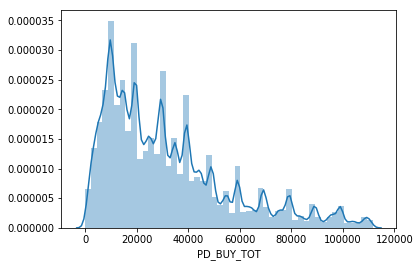

In [63]:
sns.distplot(BUY_filtered)

클라이언트가 한번 접속 시 마다 평균 2-3개의 세션을 약 2번 씩 옮겨다닌다.


클라이언트는 평균적으로 5-6개의 물품을 구매한다.


클라이언트가 한번 구매하는 물품의 가격은 평균 54000원 정도 이다. 그러나 75% 수준이 53000원이고, 가장 많은 금액을 쓴 사람은 한번에 3900만원을 사용하였다. IQR1.5 선에서 데이터를 필터링하고 히스토그램을 살펴보았는데, 그래프가 positively skewed 되어 있었다. Feature engineering 시 log transfomration을 사용 해야 할 것으로 보인다

In [64]:
# 메모리 용량을 위해 쓰지 않는 변수 제거
del df_Product

### 2) Search1

In [65]:
#빠른 계산을 위해 데이터를 나눔
df_Search1 = df_interaction_full[df_interaction_full.ACTION == 'search']

In [66]:
df_Search1.head()[['CLNT_ID','SESS_ID','CLNT_GENDER','CLNT_AGE','KWD_NM']]

,CLNT_ID,SESS_ID,CLNT_GENDER,CLNT_AGE,KWD_NM
5024906,5607714,7112876,F,40,빌리프 아이크림
5024907,2085191,7139576,F,30,빌리프 아이크림
5024908,5607714,7112876,F,40,헤라 베이스
5024909,5607714,7112876,F,40,헤라
5024910,3704949,7113722,0,0,헤라


In [67]:
#총 상호작용 수
n_interactions_S1 = len(df_Search1)

#클라이언트 수
n_CLNT_ID_S1 = len(set(df_Search1.CLNT_ID))

#세선 수
n_SESS_ID_S1 = len(set(df_Search1.SESS_ID))

# 검색 키워드 수
n_KWD_NM_S1 = len(set(df_Search1.KWD_NM))

# 클라이언트 별 평균 고유 세션 수
n_unique_SESS_per_CLNT_S1 = \
df_Search1.SESS_ID.groupby(df_Search1.CLNT_ID).nunique().mean()

# 클라이언트 별 평균 세션 수 
SESS_per_CLNT_S1 = \
df_Search1.SESS_ID.groupby(df_Search1.CLNT_ID).count().mean()

# 클라이언트 별 검색 키워드수
n_KWD_per_CLNT_S1 = \
df_Search1.KWD_NM.groupby(df_Search1.CLNT_ID).nunique().mean()


# 클라이언트 별 평균 검색 키워드 수
SEARCH_CNT_per_CLNT_MEAN_S1 = df_Search1.SEARCH_CNT.groupby(df_Search1.CLNT_ID).sum().mean()

print(\
'상호작용 수 : %d 회\n\
클라이언트 수 : %d 명\n\
세션 수 : %d 개\n\
검색키워드 수 : %.2f\n\
클라이언트 별 평균 고유 세션 수 : %.2f 개\n\
클라이언트 별 평균 세션 수 : %d 개\n\
클라이언트 별 검색 키워드수 : %d 개\n\
클라이언트 별 평균 검색 키워드 수 : %.2f 개\n\
'%(n_interactions_S1,n_CLNT_ID_S1,n_SESS_ID_S1,n_KWD_NM_S1,n_unique_SESS_per_CLNT_S1,\
               SESS_per_CLNT_S1,n_KWD_per_CLNT_S1,SEARCH_CNT_per_CLNT_MEAN_S1))
      

상호작용 수 : 2884943 회
클라이언트 수 : 511477 명
세션 수 : 1160589 개
검색키워드 수 : 81539.00
클라이언트 별 평균 고유 세션 수 : 2.39 개
클라이언트 별 평균 세션 수 : 5 개
클라이언트 별 검색 키워드수 : 5 개
클라이언트 별 평균 검색 키워드 수 : 10.77 개



In [68]:
#주일별 검색량
print('주일별 검색량')
df_Search1.WKDAY.value_counts()/len(df_Search1.WKDAY)

주일별 검색량


0    0.172103
6    0.161191
1    0.148241
2    0.145951
3    0.132532
5    0.121282
4    0.118699
Name: WKDAY, dtype: float64

In [69]:
SEARCH_S1= df_Search1.SEARCH_CNT.groupby(df_Search1.CLNT_ID).sum()
SEARCH_S1.describe().round(2)

count    511477.00
mean         10.77
std          23.62
min           1.00
25%           2.00
50%           5.00
75%          11.00
max        4053.00
Name: SEARCH_CNT, dtype: float64

In [70]:
SEARCH_S1_filtered = IQR_filter(SEARCH_S1)
SEARCH_S1_filtered.describe().round(2)

count    461627.00
mean          6.01
std           5.49
min           1.00
25%           2.00
50%           4.00
75%           8.00
max          24.00
Name: SEARCH_CNT, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


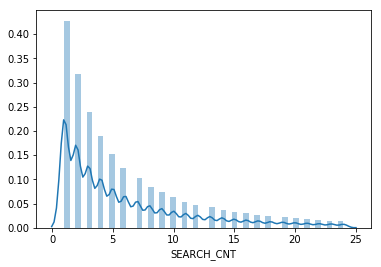

In [71]:
sns.distplot(SEARCH_S1_filtered)

### Search2

In [72]:
df_Search2 = df_Search1[['SESS_DT','KWD_NM','SEARCH_CNT_DT','WKDAY','MONTH']].drop_duplicates()

In [73]:
df_Search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT_DT,WKDAY,MONTH
5024906,2018-06-03,빌리프 아이크림,17,6,6
5024908,2018-06-03,헤라 베이스,1,6,6
5024909,2018-06-03,헤라,236,6,6
5024934,2018-07-23,프리메라 마스크팩,8,0,7
5024936,2018-07-23,여성청결제,16,0,7


In [74]:
df_Search_count = df_Search2.groupby([df_Search2.MONTH, df_Search2.KWD_NM])['SEARCH_CNT_DT'].sum()

In [75]:
for month in range(4,10):
    print('\n%d 월'%month)
    print(df_Search_count[month].sort_values(ascending=False).head(5))



4 월
KWD_NM
원피스         48847
블라우스        34161
에이치커넥트      32014
에고이스트       29560
써스데이아일랜드    28107
Name: SEARCH_CNT_DT, dtype: int32

5 월
KWD_NM
원피스       59133
에이치커넥트    30454
블라우스      28029
여성샌들      27635
에고이스트     26387
Name: SEARCH_CNT_DT, dtype: int32

6 월
KWD_NM
원피스       66320
여성샌들      48235
블라우스      28903
빈폴레이디스    25160
에고이스트     24722
Name: SEARCH_CNT_DT, dtype: int32

7 월
KWD_NM
원피스      74965
여성샌들     40858
양산       32025
래쉬가드     28960
에고이스트    26315
Name: SEARCH_CNT_DT, dtype: int32

8 월
KWD_NM
원피스       53132
에고이스트     26504
빈폴레이디스    22155
블라우스      21007
롱패딩       19933
Name: SEARCH_CNT_DT, dtype: int32

9 월
KWD_NM
원피스        43360
에고이스트      29426
헤지스레이디스    28392
롱패딩        25608
빈폴레이디스     25597
Name: SEARCH_CNT_DT, dtype: int32


사람을이 5월달부터 샌들을 찾고, 8-9월부터 롱패딩을 찾는다. 세일 이벤트 떄문일까? 그리고 에고이스트라는 브랜드를 많이 찾는다. 찾아봤는데 뭔지 잘 모르겠다

In [76]:
#메모리 확보를 위해 불필요한 변수 제거
del df_Search1, df_Search2

### Custom

In [77]:
df_Custom = df_interaction_full[['CLNT_ID','CLNT_GENDER','CLNT_AGE']].drop_duplicates()

In [78]:
df_Custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4139680,0,0
4,4350334,F,30
5,5131391,F,30
7,5172356,0,0
8,5444959,F,30


In [79]:
#비회원 비율
print('비회원 비율')
len(df_Custom[(df_Custom.CLNT_GENDER == 0)&(df_Custom.CLNT_AGE == 0)])/len(df_Custom)

비회원 비율


0.27207969334707505

In [80]:
df_Custom_only = df_Custom[(df_Custom.CLNT_GENDER != 0)&(df_Custom.CLNT_AGE != 0)]

In [81]:
#남성/여성 비율
print('남녀 비율')
df_Custom_only.CLNT_GENDER.value_counts()/len(df_Custom_only.CLNT_GENDER)

남녀 비율


F    0.849537
M    0.150463
Name: CLNT_GENDER, dtype: float64

In [82]:
#연령 비율
print('연령 비율')
df_Custom_only.CLNT_AGE.value_counts()/len(df_Custom_only.CLNT_AGE)

연령 비율


30    0.466890
40    0.321905
20    0.141879
50    0.054526
60    0.007825
10    0.005668
70    0.001260
80    0.000048
Name: CLNT_AGE, dtype: float64

In [83]:
f3040 = len(df_Custom_only[(df_Custom_only.CLNT_GENDER == 'F') & ((df_Custom_only.CLNT_AGE == 30)|(df_Custom_only.CLNT_AGE == 40))])/len(df_Custom_only)
print('30-40대 여성 비율 : %.2f%%'%(f3040*100))


30-40대 여성 비율 : 67.31%


L.pay의 주요 고객층은 3-40대의 여성(67.31%)이므로 이들을 위한 타겟팅이 필요하다

In [84]:
del df_Custom, df_Custom_only

### Session

In [85]:
df_Session_new = df_interaction_full[['CLNT_ID','SESS_ID','SESS_SEQ','SESS_DT','TOT_PAG_VIEW_CT','TOT_SESS_HR_V','DVC_CTG_NM','ZON_NM','CITY_NM']].drop_duplicates()

In [86]:
#클라이언트의 평균 체류시간

HR_V_per_CLNT_MEAN = df_Session_new.TOT_SESS_HR_V.groupby(df_Session_new.CLNT_ID).mean().mean()

#클라이언트 평균 페이지 조회건수
PAG_per_CLNT_MEAN = df_Session_new.TOT_PAG_VIEW_CT.groupby(df_Session_new.CLNT_ID).mean().mean()

print(\
'클라이언트 평균 체류시간 : %.2f 분\n\
클라이언트 평균 페이지 조회건수 : %.2f 회'%(HR_V_per_CLNT_MEAN/60, PAG_per_CLNT_MEAN))

클라이언트 평균 체류시간 : 24.11 분
클라이언트 평균 페이지 조회건수 : 73.49 회


In [87]:
#사용 기기유형
print('사용 기기유형')
df_Session_new.DVC_CTG_NM.value_counts()/len(df_Session_new.DVC_CTG_NM)

사용 기기유형


mobile     0.843995
desktop    0.151560
tablet     0.004444
Name: DVC_CTG_NM, dtype: float64

In [88]:
# 사용 지역 대분류
print('사용지역 대분류')
df_Session_new.ZON_NM.value_counts()/len(df_Session_new.ZON_NM)

사용지역 대분류


Seoul                0.375923
Gyeonggi-do          0.173229
Busan                0.109086
Gyeongsangnam-do     0.047446
Daegu                0.043019
Incheon              0.037129
Gyeongsangbuk-do     0.033611
Jeollabuk-do         0.028913
Chungcheongnam-do    0.028778
Gwangju              0.026088
Daejeon              0.022279
Jeollanam-do         0.018172
Ulsan                0.017171
Chungcheongbuk-do    0.016386
Gangwon-do           0.015740
Jeju-do              0.007030
Name: ZON_NM, dtype: float64

In [89]:
# 사용 지역 대분류
print('사용지역 중분류')
(df_Session_new.CITY_NM.value_counts()/len(df_Session_new.CITY_NM))[:10]

사용지역 중분류


Seoul        0.375922
Busan        0.109086
Daegu        0.043019
Incheon      0.037129
Gwangju      0.026088
Daejeon      0.022279
Gimhae-si    0.018105
Goyang-si    0.017549
Suwon-si     0.017369
Ulsan        0.017171
Name: CITY_NM, dtype: float64

In [90]:
HR_V_per_CLNT = df_Session_new.TOT_SESS_HR_V.groupby(df_Session_new.CLNT_ID).mean()/3600
HR_V_per_CLNT.describe()

count    922737.000000
mean          0.401831
std           0.357324
min           0.000000
25%           0.165000
50%           0.307222
75%           0.522500
max           7.810000
Name: TOT_SESS_HR_V, dtype: float64

평균 체류시간


C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


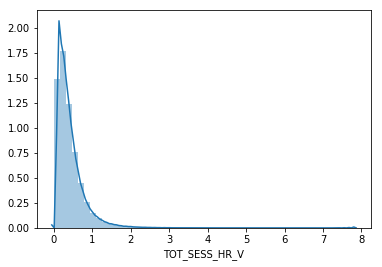

In [91]:
#평균 체류 시간
print('평균 체류시간')
sns.distplot(HR_V_per_CLNT)

In [92]:
# 이상치 제거

HR_V_per_CLNT_filtered = IQR_filter(HR_V_per_CLNT)
HR_V_per_CLNT_filtered.describe().round(2)

count    876047.00
mean          0.34
std           0.23
min           0.00
25%           0.16
50%           0.29
75%           0.48
max           1.06
Name: TOT_SESS_HR_V, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


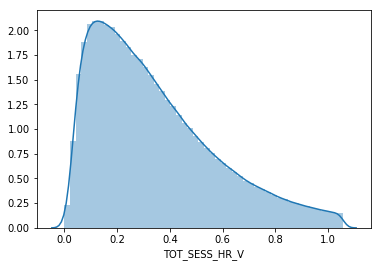

In [93]:
#평균 체류시간
sns.distplot(HR_V_per_CLNT_filtered)

In [94]:
#평균 페이지뷰 수
PAG_per_CLNT = df_Session_new.TOT_PAG_VIEW_CT.groupby(df_Session_new.CLNT_ID).mean()
PAG_per_CLNT.describe().round(2)

count    922737.00
mean         73.49
std          63.63
min           0.00
25%          30.00
50%          55.00
75%          96.33
max         499.00
Name: TOT_PAG_VIEW_CT, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


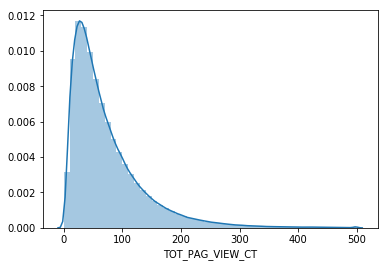

In [95]:
#평균 페이지 뷰수
sns.distplot(PAG_per_CLNT)

In [96]:
PAG_per_CLNT_filtered = IQR_filter(PAG_per_CLNT)
PAG_per_CLNT_filtered.describe().round(2)

count    874935.00
mean         62.99
std          43.47
min           0.00
25%          29.00
50%          52.00
75%          87.75
max         195.82
Name: TOT_PAG_VIEW_CT, dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


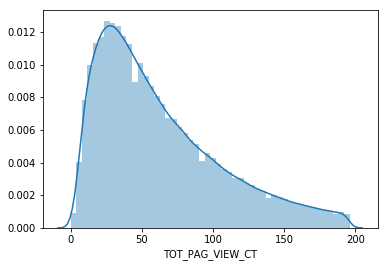

In [97]:
#클라이언트 당 평균 페이지 뷰수
sns.distplot(PAG_per_CLNT_filtered)

### Master

In [98]:
df_Master = df_interaction_full[['PD_C','PD_NM','CLAC1_NM','CLAC2_NM','CLAC3_NM']].drop_duplicates()

In [99]:
#총 상품 코드 수
n_PD_C_m = len(df_Master)

#총 상품명
n_PD_NM_m = len(set(df_Master.PD_NM))

#상품 대분류 갯수
n_CLAC1_NM = len(set(df_Master.CLAC1_NM))

#상품 중분류 갯수
n_CLAC2_NM = len(set(df_Master.CLAC2_NM))

#상품 소분류 갯수
n_CLAC3_NM = len(set(df_Master.CLAC3_NM))

print(\
'총 상품 코드 수 : %d 개\n\
총 상품 개수 : %d 개\n\
상품 대분류 개수 : %d 개\n\
상품 중분류 개수 : %d 개\n\
상품 소분류 개수 : %d 개\n'\
%(n_PD_C_m,n_PD_NM_m,n_CLAC1_NM,n_CLAC2_NM,n_CLAC3_NM))


총 상품 코드 수 : 847653 개
총 상품 개수 : 817422 개
상품 대분류 개수 : 38 개
상품 중분류 개수 : 129 개
상품 소분류 개수 : 899 개



In [100]:
#상품 대분류 비율
print('상품 대분류 비율')
(df_Master.CLAC1_NM.value_counts()/len(df_Master.CLAC1_NM))[:10]

상품 대분류 비율


여성의류         0.213657
패션잡화         0.131662
스포츠패션        0.123037
남성의류         0.102858
유아동의류        0.072877
속옷/양말/홈웨어    0.072746
화장품/뷰티케어     0.035405
시즌스포츠        0.026291
문구/사무용품      0.021864
식기/조리기구      0.020669
Name: CLAC1_NM, dtype: float64

### 쇼핑몰 주요 고객

In [101]:
df_Product = df_interaction_full[(df_interaction_full.ACTION =='product')]

In [102]:
#session 사용자 중 모바일 사용 30-40 여성 비율
f3040m = len(df_interaction_full[(df_interaction_full.CLNT_GENDER == 'F') & ((df_interaction_full.CLNT_AGE == 30)|(df_interaction_full.CLNT_AGE == 40))&(df_interaction_full.DVC_CTG_NM == 'mobile')])/len(df_interaction_full)
print('모바일 사용 30-40대 여성 비율 : %.2f%%'%(f3040m*100))


모바일 사용 30-40대 여성 비율 : 58.60%


In [103]:
#session 사용자 중 모바일 사용 30-40 여성의 구매율
f3040m_buy = len(df_Product[(df_Product.CLNT_GENDER == 'F') & ((df_Product.CLNT_AGE == 30)|(df_Product.CLNT_AGE == 40))&
                                     (df_Product.DVC_CTG_NM == 'mobile')])/len(df_Product)
print('모바일 사용 30-40대 여성의 구매율 : %.2f%%'%(f3040m_buy*100))

모바일 사용 30-40대 여성의 구매율 : 58.10%


In [104]:
df_f3040m_product = df_Product[(df_Product.CLNT_GENDER == 'F') & ((df_Product.CLNT_AGE == 30)|(df_Product.CLNT_AGE == 40))&(df_Product.DVC_CTG_NM == 'mobile')]

In [105]:
df_f3040m_product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT,CUSTOM
4,4350334,2023661,77,642112,색상:엔젤 / 1개,바비브라운,39000,1,39000,F,30,528,2018-08-27,108,738,mobile,Seoul,Seoul,8,0,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,Y
5,5131391,7757426,77,642112,색상:루비 / 1개,바비브라운,39000,1,39000,F,30,14,2018-05-24,82,1925,mobile,Busan,Busan,5,3,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,Y
6,5131391,7757426,77,642112,색상:카바나 / 1개,바비브라운,39000,1,39000,F,30,14,2018-05-24,82,1925,mobile,Busan,Busan,5,3,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,Y
8,5444959,6843465,24,642112,색상:워터멜론 / 1개,바비브라운,39000,1,39000,F,30,130,2018-06-08,40,400,mobile,Gyeonggi-do,Namyangju-si,6,4,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,Y
9,5461276,7896792,53,642112,색상:워터멜론 / 1개,바비브라운,39000,1,39000,F,30,2,2018-05-21,53,1553,mobile,Daegu,Daegu,5,0,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터,product,0,0,0,Y


In [106]:
f3040m_buy = (df_f3040m_product.PD_BUY_AM*df_f3040m_product.PD_BUY_CT)
f3040m_buy.describe().round(2)

count     2919430.00
mean        50072.09
std        109626.01
min           100.00
25%         13900.00
50%         28900.00
75%         49900.00
max      12234000.00
dtype: float64

In [107]:
f3040m_buy_filtered = IQR_filter(f3040m_buy)
f3040m_buy_filtered.describe().round(2)

count    2662201.00
mean       30863.23
std        23065.59
min          100.00
25%        12800.00
50%        25000.00
75%        42000.00
max       103840.00
dtype: float64

C:\Users\taeny\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


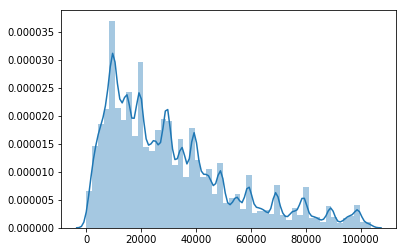

In [108]:
sns.distplot(f3040m_buy_filtered)

### 변수 의미 파악하기

In [116]:
#세션일련번호
df_Session_new.sort_values(by=['SESS_SEQ']).head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,4139680,7605037,1,2018-05-26,21,902,desktop,Seoul,Seoul
250408,2949012,10504303,1,2018-04-08,61,3101,desktop,Gyeonggi-do,Gwacheon-si
1958921,1906660,9497431,1,2018-04-25,47,1690,desktop,Gyeongsangnam-do,Gimhae-si
250420,2254029,8595481,1,2018-05-10,55,1272,desktop,Gyeonggi-do,Namyangju-si
4234497,792757,9500530,1,2018-04-25,53,742,mobile,Seoul,Seoul


In [117]:
#검색건수
df_interaction_full[df_interaction_full.ACTION=='search'].sort_values(by=['CLNT_ID','SESS_ID','SEARCH_CNT']).head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT,CUSTOM
6528868,1000021,5084873,0,0,0,0,0,0,0,F,30,88,2018-07-07,210,1515,mobile,Seoul,Seoul,7,5,0,0,0,0,search,세럼,1,17,Y
5387153,1000021,5084873,0,0,0,0,0,0,0,F,30,88,2018-07-07,210,1515,mobile,Seoul,Seoul,7,5,0,0,0,0,search,헤라,2,256,Y
5735498,1000021,5084873,0,0,0,0,0,0,0,F,30,88,2018-07-07,210,1515,mobile,Seoul,Seoul,7,5,0,0,0,0,search,에센스,5,47,Y
7516684,1000021,10346015,0,0,0,0,0,0,0,F,30,79,2018-04-11,230,5086,mobile,Seoul,Seoul,4,2,0,0,0,0,search,그라탕기,1,7,Y
5666814,1000033,6768423,0,0,0,0,0,0,0,F,20,23,2018-06-09,37,278,mobile,Seoul,Seoul,6,5,0,0,0,0,search,샤넬 향수,1,14,Y


In [118]:
#세션 시퀀스
df_interaction_full.sort_values(by=['CLNT_ID','SESS_DT','SESS_SEQ','HITS_SEQ']).head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,MONTH,WKDAY,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,ACTION,KWD_NM,SEARCH_CNT,SEARCH_CNT_DT,CUSTOM
821263,100,17311,7,706926,상품명:아몬드 브리즈 언스위트 190mlx24팩,[매일],14500,1,14500,0,0,6,2018-09-30,7,492,desktop,Seoul,Seoul,9,6,아몬드브리즈 언스위트 190ml 24팩 - 아몬드 브리즈 언스위트 190ml 24팩,음료,두유,일반두유,product,0,0,0,N
933617,100,7664,6,214697,선택:다운젤리 10가지 맛보기 세트 (10EA),[벨리불리],8900,1,8900,0,0,7,2018-09-30,5,193,desktop,Seoul,Seoul,9,6,최저 4kcal/워터젤리 맛보기 1BOX(각1팩/총 10개입/무료배송) - 다운젤리...,건강식품,건강보조식품,미용보조식품,product,0,0,0,N
3126589,10000,8478796,57,329753,색상:레드(Red)|사이즈:230mm / 1개,사뿐(Sappun),38900,1,38900,F,20,13,2018-05-12,49,802,mobile,Gyeonggi-do,Siheung-si,5,5,셀린즈 스퀘어 리본 플랫슈즈 (3cm) - 베이지(Beige) / 250mm,패션잡화,여성화,여성플랫,product,0,0,0,Y
3126586,10000,8398058,2,329753,색상:레드(Red)|사이즈:230mm / 1개,사뿐(Sappun),38900,1,38900,F,20,14,2018-05-13,2,3,mobile,Gyeonggi-do,Siheung-si,5,6,셀린즈 스퀘어 리본 플랫슈즈 (3cm) - 베이지(Beige) / 250mm,패션잡화,여성화,여성플랫,product,0,0,0,Y
7516684,1000021,10346015,0,0,0,0,0,0,0,F,30,79,2018-04-11,230,5086,mobile,Seoul,Seoul,4,2,0,0,0,0,search,그라탕기,1,7,Y


In [119]:
#일별 검색량
df_interaction_full[df_interaction_full.KWD_NM == '힙업팬티'].sort_values(by=['KWD_NM','SESS_DT','SEARCH_CNT_DT']).loc[:,['KWD_NM','SESS_DT','SEARCH_CNT_DT']].head()

,KWD_NM,SESS_DT,SEARCH_CNT_DT
6582959,힙업팬티,2018-04-08,1
7659418,힙업팬티,2018-04-29,5
7779712,힙업팬티,2018-05-19,4
7651411,힙업팬티,2018-05-22,2
7753763,힙업팬티,2018-05-24,4


In [120]:
#일별검색량
df_interaction_full[df_interaction_full.KWD_NM == '힙업팬티'].sort_values(by=['SESS_DT']).loc[:,['CLNT_GENDER','CLNT_AGE','SESS_DT','KWD_NM','SEARCH_CNT']].head()

,CLNT_GENDER,CLNT_AGE,SESS_DT,KWD_NM,SEARCH_CNT
6582959,F,50,2018-04-08,힙업팬티,1
7659418,0,0,2018-04-29,힙업팬티,5
7779712,F,30,2018-05-19,힙업팬티,1
7651411,M,30,2018-05-22,힙업팬티,1
7753763,M,30,2018-05-24,힙업팬티,4


4월 8일 : 1명이 힙업팬티를 1번 검색했으며 그대로 구매

4월 29일 : 1명이 힙업팬트를 5번 검색했으며 바로 구매

5월 19일 : N명이 힙업팬티를 4번 검색했으며 힙업팬티를 1번 검색한 1명이 구매

5월 22일 : 2명이 힙업팬티를 1번씩 검색했으며 힙업팬티를 그중 1명이 구매

5월 24일 : 1명이 힙업팬티를 4번 검색했으며 바로 구매

In [121]:
#저장
#df_interaction_full.to_csv('data/df_interaction_full.csv',index =False)